In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置 plt 画布特征
# plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
%matplotlib inline

本练习内容主要是线性回归，不管是单变量还是多变量，模型的成本函数和梯度下降算法表示一致。

## 代价函数
$$
J(\theta_{0},\theta_{1})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
其中，$h_{\theta}(x)=\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+…+\theta_{n}x_{n}$

向量化表示：
$$
J(\theta) = \frac{1}{2m}(X\theta^{T}-y)^{2}
$$
其中，此公式的平方指，向量各值的平方。

In [3]:
# 计算成本函数
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

## 批量下降算法

$$
\theta_{j}:=\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1},...,\theta_{n})
$$

数学推导式：
$$
\theta_{j}:=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})\cdot x_{j}^{i})
$$

In [4]:
# 批量下降算法
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
    
    return theta, cost

## 单变量线性回归

In [5]:
# 读取 ex1data1 数据，第一列为 Population，第二列为 Profit
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
'''
数据预处理——输入变量添加单位列

使用向量化运算前，需要在数据中添加新列，值全为 1.
X = [X_0, X_1]
theta = [theta_0, theta_1]
Y = X * theta.T
'''
data.insert(0, 'Ones', 1)
data.head(5)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# 提取输入和输出变量
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1: cols]

In [8]:
# 代价函数传入参数为 numpy 矩阵，需要转换为矩阵，并初始化参数
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0, 0]))

In [9]:
# 设置参数——学习率与迭代次数
alpha = 0.01
iters = 1000

In [10]:
# 模型训练
g, cost = gradientDescent(X, y, theta, alpha, iters)
g, cost[-1]

(matrix([[-3.24140214,  1.1272942 ]]), 4.515955503078914)

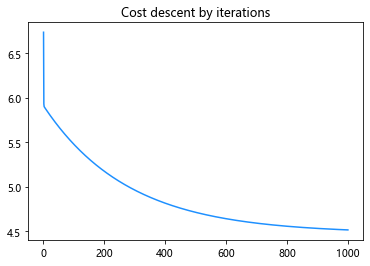

In [11]:
# 绘制成本函数随迭代次数的下降曲线
iterations = np.arange(1, iters+1, 1, dtype=int)
fig, plt_cost = plt.subplots(figsize=(6, 4))
plt_cost.plot(iterations, cost, label='Cost', color='dodgerblue')
plt_cost.set_ylabel('Cost')
plt_cost.set_xlabel('Iterations')
plt_cost.set_title('Cost descent by iterations')
plt.show()

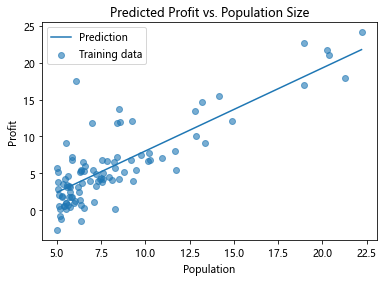

In [12]:
# 对比实际数据点与预测函数
x_draw = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1] * x_draw)

fig, plt_train = plt.subplots(figsize=(6, 4))
plt_train.plot(x_draw, f, label='Prediction')
plt_train.scatter(np.array(X[:,1]), np.array(y[:,0]), alpha=0.6, label='Training data')
plt_train.legend(loc=2)
plt_train.set_ylabel('Profit')
plt_train.set_xlabel('Population')
plt_train.set_title('Predicted Profit vs. Population Size')
plt.show()

In [13]:
# 试一下改变参数学习率和迭代次数，看看效果（大家也可以自行试试）
alpha_2 = 0.01
iters_2 = 10000
g_2, cost_2 = gradientDescent(X, y, theta, alpha_2, iters_2)
g_2, cost_2[-1]

(matrix([[-3.89578082,  1.19303364]]), 4.476971375975179)

将迭代次数增加到原来的10倍，但成本减小的程度非常小，可见对该模型而言，已经达到了较好的水平了。

如果想进一步提升拟合度，可能需要更换模型进行求解了。

## 多变量线性回归

P2: 房屋价格数据集 ex1data2.txt，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格），建立线性回归模型预测房价。

In [14]:
# 读取 ex1data2.txt
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对P2，对数据进行预处理 - 特征归一化。

In [15]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


重复 P1 的预处理步骤 - 添加单元列

In [16]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# show final theta and cost
g2, cost2[-1]

(matrix([[-9.77173425e-17,  8.78503652e-01, -4.69166570e-02]]),
 0.1307033696077189)

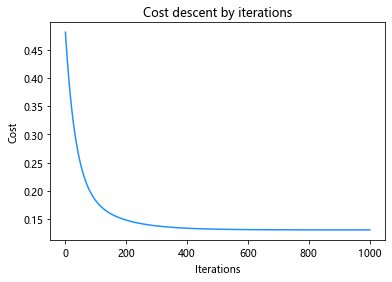

In [17]:
# 绘制成本函数随迭代次数的下降曲线
iterations = np.arange(1, iters+1, 1, dtype=int)
fig, plt_cost = plt.subplots(figsize=(6, 4))
plt_cost.plot(iterations, cost2, label='Cost', color='dodgerblue')
plt_cost.set_ylabel('Cost')
plt_cost.set_xlabel('Iterations')
plt_cost.set_title('Cost descent by iterations')
plt.show()

C:\Users\ZEHUAN~1\AppData\Local\Temp/ipykernel_132712/1169568881.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt_train = fig.gca(projection='3d')


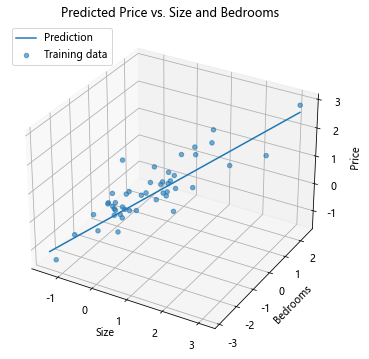

In [18]:
# 对比实际数据点与预测函数

# 三维数据
x1_draw = np.linspace(data2.Size.min(), data2.Size.max(), 100)
x2_draw = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
f = g2[0,0] + g2[0,1] * x1_draw + g2[0,2] * x2_draw

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
plt_train = fig.gca(projection='3d')

# fig, plt_train = plt.subplots(figsize=(6, 4))
plt_train.plot(x1_draw, x2_draw, f, label='Prediction')
plt_train.scatter(np.array(X2[:,1]), np.array(X2[:,2]), np.array(y2[:,0]), alpha=0.6, label='Training data')
plt_train.legend(loc=2)
plt_train.set_xlabel('Size')
plt_train.set_ylabel('Bedrooms')
plt_train.set_zlabel('Price')
plt_train.set_title('Predicted Price vs. Size and Bedrooms')
plt.show()

## sklearn 线性回归模型

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

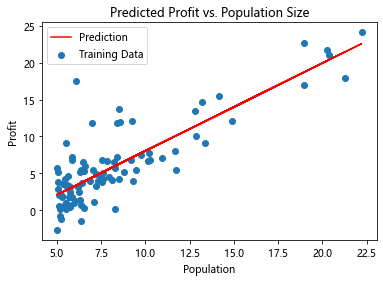

In [20]:
# scikit-learn model的预测表现
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## normal equation（正规方程）

$$
\theta=(X^{T}X)^{-1}X^{T}y
$$

In [21]:
# 正规方程
def normalEqn(X, y):
    return np.linalg.inv(X.T@X)@X.T@y # np.linalg.inv 求逆，X.T 转置，.dot(X) 矩阵乘法，可 @ 代替

In [22]:
theta_nE = normalEqn(X2, y2)
theta_nE, computeCost(X2, y2, theta_nE.T) # 转置处理是因为 theta_nE 为列向量矩阵，而 computeCost 的传入参数为横向量矩阵

(matrix([[-7.63278329e-17],
         [ 8.84765988e-01],
         [-5.31788197e-02]]),
 0.13068648053904194)

批量梯度下降的结果：(matrix([[-9.77173425e-17,  8.78503652e-01, -4.69166570e-02]]), 0.1307033696077189)

可见正规方程和批量梯度下降的结果存在一定的差异。